In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customer= pd.read_csv('D:/ALS/Case Studies/1.Assignments – Case studies (Mandatory for Submissions)/3.Pandas Case Study 1-Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Customer.csv')

In [3]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [5]:
product_category=pd.read_csv('D:/ALS/Case Studies/1.Assignments – Case studies (Mandatory for Submissions)/3.Pandas Case Study 1-Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv')

In [6]:
product_category.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [7]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [8]:
transaction=pd.read_csv('D:/ALS/Case Studies/1.Assignments – Case studies (Mandatory for Submissions)/3.Pandas Case Study 1-Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv')

In [9]:
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [10]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly

In [11]:
transaction.rename(columns={'cust_id': 'customer_Id'}, inplace=True)
transaction.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [12]:
product_category.rename(columns={'prod_sub_cat_code':'prod_subcat_code'}, inplace=True)
product_category.head(1)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens


In [13]:
tansaction_category=pd.merge(transaction, product_category, on=['prod_cat_code','prod_subcat_code'], how='left')
tansaction_category

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [14]:
tansaction_category.isnull().sum()

transaction_id      0
customer_Id         0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [15]:
Customer_Final= pd.merge(customer, tansaction_category, on='customer_Id', how='right')

In [16]:
Customer_Final.shape

(23053, 15)

In [17]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_Id       23053 non-null  int64  
 1   DOB               23053 non-null  object 
 2   Gender            23044 non-null  object 
 3   city_code         23045 non-null  float64
 4   transaction_id    23053 non-null  int64  
 5   tran_date         23053 non-null  object 
 6   prod_subcat_code  23053 non-null  int64  
 7   prod_cat_code     23053 non-null  int64  
 8   Qty               23053 non-null  int64  
 9   Rate              23053 non-null  int64  
 10  Tax               23053 non-null  float64
 11  total_amt         23053 non-null  float64
 12  Store_type        23053 non-null  object 
 13  prod_cat          23053 non-null  object 
 14  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


In [18]:
Customer_Final.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,268408,02-01-1970,M,4.0,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,02-01-1970,M,4.0,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,Mens


In [19]:
Customer_Final.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

### 2. Prepare a summary report for the merged data set. 

#### a. Get the column names and their corresponding data types 

In [20]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_Id       23053 non-null  int64  
 1   DOB               23053 non-null  object 
 2   Gender            23044 non-null  object 
 3   city_code         23045 non-null  float64
 4   transaction_id    23053 non-null  int64  
 5   tran_date         23053 non-null  object 
 6   prod_subcat_code  23053 non-null  int64  
 7   prod_cat_code     23053 non-null  int64  
 8   Qty               23053 non-null  int64  
 9   Rate              23053 non-null  int64  
 10  Tax               23053 non-null  float64
 11  total_amt         23053 non-null  float64
 12  Store_type        23053 non-null  object 
 13  prod_cat          23053 non-null  object 
 14  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


#### b. Top/Bottom 10 observations

In [21]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,268408,02-01-1970,M,4.0,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,02-01-1970,M,4.0,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,Mens
3,268408,02-01-1970,M,4.0,28810141075,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,02-01-1970,M,4.0,64633435931,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,Footwear,Kids
5,268408,02-01-1970,M,4.0,56902862040,30-01-2013,9,3,5,868,455.700,4795.700,e-Shop,Electronics,Cameras
6,268408,02-01-1970,M,4.0,56844530655,14-10-2012,1,2,5,1175,616.875,6491.875,MBR,Footwear,Mens
7,268408,02-01-1970,M,4.0,19516063887,7/9/2012,10,3,4,650,273.000,2873.000,e-Shop,Electronics,Audio and video
8,268408,02-01-1970,M,4.0,12644501524,14-08-2012,4,4,3,321,101.115,1064.115,TeleShop,Bags,Women
9,268408,02-01-1970,M,4.0,63314547725,26-04-2012,1,1,1,806,84.630,890.630,Flagship store,Clothing,Women


In [22]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,270476,25-12-1992,F,3.0,78034405353,13-08-2013,11,6,1,971,101.955,1072.955,TeleShop,Home and kitchen,Bath
23044,270476,25-12-1992,F,3.0,3359888057,16-03-2013,10,3,4,361,151.620,1595.620,MBR,Electronics,Audio and video
23045,270476,25-12-1992,F,3.0,22883386455,22-05-2012,4,2,4,898,377.160,3969.160,Flagship store,Footwear,Kids
23046,270476,25-12-1992,F,3.0,19725194268,21-02-2012,4,4,4,618,259.560,2731.560,e-Shop,Bags,Women
23047,270476,25-12-1992,F,3.0,85475160771,9/8/2011,5,3,5,1354,710.850,7480.850,Flagship store,Electronics,Computers
23048,269626,27-12-1992,F,5.0,71369029396,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,Tools
23049,269626,27-12-1992,F,5.0,94134051896,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,Kids
23050,274308,29-12-1992,F,5.0,26208690928,22-10-2012,1,2,2,898,188.580,1984.580,MBR,Footwear,Mens
23051,274308,29-12-1992,F,5.0,57358822237,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,Footwear,Mens
23052,274308,29-12-1992,F,5.0,58160544337,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,Books,Academic


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max) 

In [23]:
Customer_Final.quantile(q=0.25,
    axis=0,
    numeric_only=True,)

customer_Id         2.689350e+05
city_code           3.000000e+00
transaction_id      2.493864e+10
prod_subcat_code    3.000000e+00
prod_cat_code       2.000000e+00
Qty                 1.000000e+00
Rate                3.120000e+02
Tax                 9.828000e+01
total_amt           7.624500e+02
Name: 0.25, dtype: float64

In [24]:
Customer_Final.describe()

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23053.000000,23045.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271021.746497,5.482534,5.007348e+10,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2431.692059,2.863499,2.898194e+10,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268935.000000,3.000000,2.493864e+10,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,270980.000000,5.000000,5.009313e+10,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,273114.000000,8.000000,7.533000e+10,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [25]:
Customer_Final.quantile(q=0.75,
    axis=0,
    numeric_only=True,)

customer_Id         2.731140e+05
city_code           8.000000e+00
transaction_id      7.533000e+10
prod_subcat_code    1.000000e+01
prod_cat_code       5.000000e+00
Qty                 4.000000e+00
Rate                1.109000e+03
Tax                 3.657150e+02
total_amt           3.569150e+03
Name: 0.75, dtype: float64

In [26]:
Customer_Final.min()

customer_Id                 266783
DOB                     01-01-1972
city_code                        1
transaction_id             3268991
tran_date                 1/1/2012
prod_subcat_code                 1
prod_cat_code                    1
Qty                             -5
Rate                         -1499
Tax                           7.35
total_amt                 -8270.92
Store_type          Flagship store
prod_cat                      Bags
prod_subcat               Academic
dtype: object

In [27]:
Customer_Final.max()

customer_Id                   275265
DOB                       29-12-1992
city_code                         10
transaction_id           99987549630
tran_date                   9/9/2013
prod_subcat_code                  12
prod_cat_code                      6
Qty                                5
Rate                            1500
Tax                            787.5
total_amt                     8287.5
Store_type                    e-Shop
prod_cat            Home and kitchen
prod_subcat                    Women
dtype: object

In [28]:
Customer_Final.median()

customer_Id         2.709800e+05
city_code           5.000000e+00
transaction_id      5.009313e+10
prod_subcat_code    5.000000e+00
prod_cat_code       4.000000e+00
Qty                 3.000000e+00
Rate                7.100000e+02
Tax                 1.990800e+02
total_amt           1.754740e+03
dtype: float64

#### d. Frequency tables for all the categorical variables 

In [29]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_Id       23053 non-null  int64  
 1   DOB               23053 non-null  object 
 2   Gender            23044 non-null  object 
 3   city_code         23045 non-null  float64
 4   transaction_id    23053 non-null  int64  
 5   tran_date         23053 non-null  object 
 6   prod_subcat_code  23053 non-null  int64  
 7   prod_cat_code     23053 non-null  int64  
 8   Qty               23053 non-null  int64  
 9   Rate              23053 non-null  int64  
 10  Tax               23053 non-null  float64
 11  total_amt         23053 non-null  float64
 12  Store_type        23053 non-null  object 
 13  prod_cat          23053 non-null  object 
 14  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


In [30]:
Customer_Cat=Customer_Final.loc[:, Customer_Final.dtypes=='object']
Customer_Cat.describe()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
count,23053,23044,23053,23053,23053,23053
unique,3987,2,1129,4,6,18
top,27-12-1988,M,13-07-2011,e-Shop,Books,Women
freq,32,11811,35,9311,6069,3048


In [31]:
Customer_Cat.nunique()

DOB            3987
Gender            2
tran_date      1129
Store_type        4
prod_cat          6
prod_subcat      18
dtype: int64

In [32]:
Customer_Cat.prod_cat.value_counts()

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

In [33]:
Customer_Cont= Customer_Final.loc[:, (Customer_Final.dtypes=='int64') | (Customer_Final.dtypes=='float64')]
Customer_Cont.describe()

,customer_Id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23053.000000,23045.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271021.746497,5.482534,5.007348e+10,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2431.692059,2.863499,2.898194e+10,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268935.000000,3.000000,2.493864e+10,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,270980.000000,5.000000,5.009313e+10,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,273114.000000,8.000000,7.533000e+10,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [34]:
Customer_Cont.columns

Index(['customer_Id', 'city_code', 'transaction_id', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'],
      dtype='object')

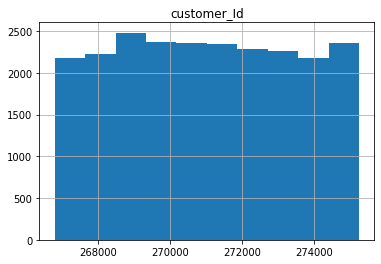

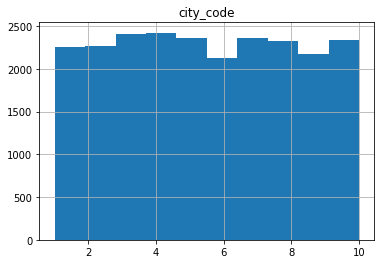

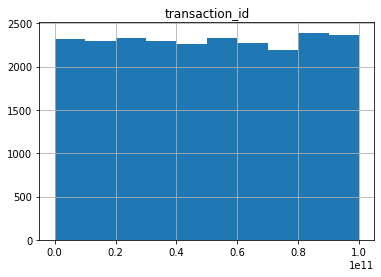

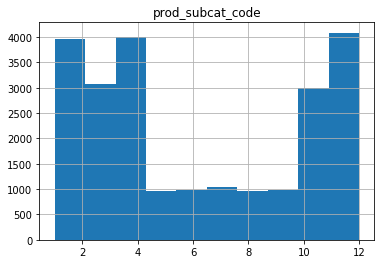

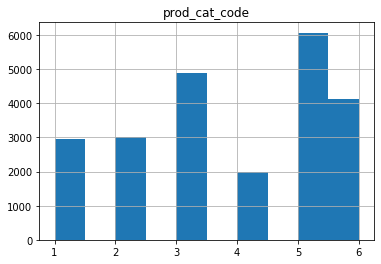

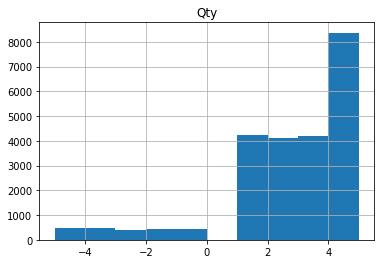

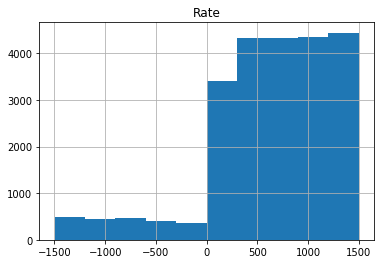

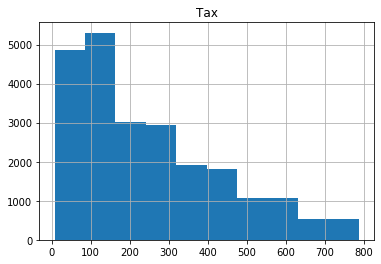

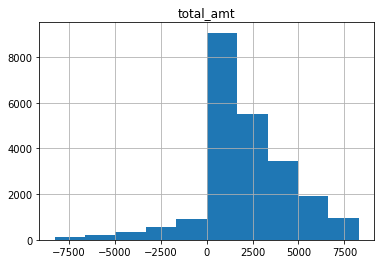

In [35]:
#histograms for all continuous variables
for col in Customer_Cont.columns:
    Customer_Cont[col].hist()
    plt.title(col)
    plt.plot()
    plt.show()
 

In [36]:
# converting "DOB" and "tran_date" from object dtype to dates
Customer_Final.DOB=pd.to_datetime(Customer_Final.DOB)
Customer_Final.tran_date= pd.to_datetime(Customer_Final.tran_date)

In [37]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       23053 non-null  int64         
 1   DOB               23053 non-null  datetime64[ns]
 2   Gender            23044 non-null  object        
 3   city_code         23045 non-null  float64       
 4   transaction_id    23053 non-null  int64         
 5   tran_date         23053 non-null  datetime64[ns]
 6   prod_subcat_code  23053 non-null  int64         
 7   prod_cat_code     23053 non-null  int64         
 8   Qty               23053 non-null  int64         
 9   Rate              23053 non-null  int64         
 10  Tax               23053 non-null  float64       
 11  total_amt         23053 non-null  float64       
 12  Store_type        23053 non-null  object        
 13  prod_cat          23053 non-null  object        
 14  prod_subcat       2305

In [38]:
Customer_Cat=Customer_Final.loc[:, Customer_Final.dtypes=='object']
Customer_Cat.describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23044,23053,23053,23053
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11811,9311,6069,3048


In [39]:
#we can ignore DOB and tran_date as high cardinality
Customer_Cat.columns

Index(['Gender', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

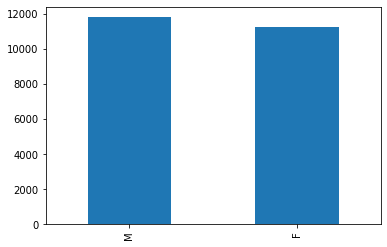

In [40]:
#frequency bars/ Count plots for categorical variables
Customer_Cat.Gender.value_counts().plot(kind='bar')
plt.show()

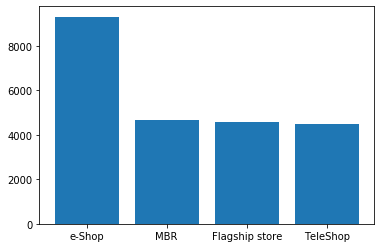

In [41]:
summ= Customer_Cat.Store_type.value_counts()
plt.bar(x=summ.index, height=summ)
plt.show()

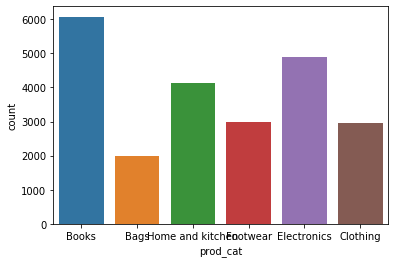

In [42]:
sns.countplot(Customer_Cat.prod_cat)
plt.show()

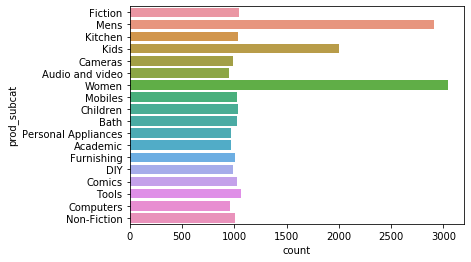

In [43]:
sns.countplot(y=Customer_Cat.prod_subcat)
plt.show()

### 4. Calculate the following information using the merged dataset 

#### a. Time period of the available transaction data

In [44]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,268408,1970-02-01,M,4.0,16197868036,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,1970-02-01,M,4.0,16197868036,2013-12-12,1,4,5,210,110.250,1160.250,Flagship store,Bags,Mens
3,268408,1970-02-01,M,4.0,28810141075,2013-02-09,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,1970-02-01,M,4.0,64633435931,2013-06-05,4,2,3,312,98.280,1034.280,Flagship store,Footwear,Kids


In [45]:
min_record=Customer_Final.sort_values(by='tran_date').min()
min_record['tran_date']

Timestamp('2011-01-02 00:00:00')

In [46]:
max_record=Customer_Final.sort_values(by='tran_date').max()
max_record['tran_date']

Timestamp('2014-12-02 00:00:00')

In [47]:
print('Time period of the available transaction data,' +
        'starts from=' +min_record['tran_date'].strftime('%Y-%m-%d') + ' & ' +
        'ends on='+max_record['tran_date'].strftime('%Y-%m-%d'))

Time period of the available transaction data,starts from=2011-01-02 & ends on=2014-12-02


#### b. Count of transactions where the total amount of transaction was negative 

In [48]:
negative_amount= Customer_Final.loc[Customer_Final.total_amt < 0]

In [49]:
negative_amount.transaction_id.count()

2177

### 5. Analyze which product categories are more popular among females vs male customers. 

In [50]:
Customer_Final.shape

(23053, 15)

In [51]:
popular_prod=Customer_Final.pivot_table(index='prod_cat', columns='Gender', aggfunc='size', fill_value=0)
popular_prod

Gender,F,M
prod_cat,,
Bags,994,1004
Books,2949,3116
Clothing,1439,1518
Electronics,2328,2570
Footwear,1529,1469
Home and kitchen,1994,2134


In [52]:
popular_prod.max()

Gender
F    2949
M    3116
dtype: int64

In [53]:
popular_prod['F'].max()

2949

In [54]:
popular_prod['M'].max()

3116

In [55]:
print('Conclusion: Most Popular Product Category among Males and Females is Books')

Conclusion: Most Popular Product Category among Males and Females is Books


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [56]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,268408,1970-02-01,M,4.0,16197868036,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens


In [57]:
CustomerCount_City=Customer_Final.groupby(['city_code']).customer_Id.agg('count')
CustomerCount_City.sort_values()

city_code
6.0     2127
9.0     2178
1.0     2258
2.0     2270
8.0     2330
10.0    2333
7.0     2356
5.0     2360
3.0     2411
4.0     2422
Name: customer_Id, dtype: int64

In [58]:
summ=CustomerCount_City.sum()
summ

23045

In [59]:
percentage_city=round((CustomerCount_City/summ)*100,2)

In [60]:
percentage_city

city_code
1.0      9.80
2.0      9.85
3.0     10.46
4.0     10.51
5.0     10.24
6.0      9.23
7.0     10.22
8.0     10.11
9.0      9.45
10.0    10.12
Name: customer_Id, dtype: float64

In [61]:
print('Conclusion: City Code 4 has maximum Customer with percentage of 10.51')

Conclusion: City Code 4 has maximum Customer with percentage of 10.51


### 7. Which store type sells the maximum products by value and by quantity?

In [62]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,268408,1970-02-01,M,4.0,16197868036,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens


In [63]:
Customer_Final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty')

C:\Users\Parul.Rana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Qty,Rate
Store_type,,
TeleShop,10984,2834420
Flagship store,11133,2941557
MBR,11194,2953253
e-Shop,22763,5941001


In [64]:
print('Conclusion: e-shop sells the maximum products by value and by quantity')

Conclusion: e-shop sells the maximum products by value and by quantity


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 

In [65]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,268408,1970-02-01,M,4.0,16197868036,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens


In [66]:
#Using Groupby
Store_Price1=Customer_Final.groupby(['prod_cat','Store_type'])['total_amt'].sum()
Store_Price1

prod_cat          Store_type    
Bags              Flagship store     870548.835
                  MBR                848678.675
                  TeleShop           789181.055
                  e-Shop            1616300.075
Books             Flagship store    2488205.850
                  MBR               2496039.195
                  TeleShop          2545005.060
                  e-Shop            5293443.935
Clothing          Flagship store    1194423.230
                  MBR               1287686.335
                  TeleShop          1241834.360
                  e-Shop            2527193.565
Electronics       Flagship store    2215136.040
                  MBR               2107514.565
                  TeleShop          1973338.835
                  e-Shop            4426474.195
Footwear          Flagship store    1234806.560
                  MBR               1112163.715
                  TeleShop          1235719.290
                  e-Shop            2637084.710
Home an

In [67]:
#Using pivot table
Store_Price2=Customer_Final.pivot_table(index='prod_cat', columns='Store_type', values='total_amt', aggfunc='sum')
Store_Price2

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1616300.075
Books,2488205.850,2496039.195,2545005.060,5293443.935
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107514.565,1973338.835,4426474.195
Footwear,1234806.560,1112163.715,1235719.290,2637084.710
Home and kitchen,1712567.675,1822403.570,1579702.475,3324319.570


In [68]:
Store_Price2.iloc[2:4, 0:1].sum()

Store_type
Flagship store    3409559.27
dtype: float64

In [69]:
Store_Price2.loc[['Clothing','Electronics'], ['Flagship store']].sum()

Store_type
Flagship store    3409559.27
dtype: float64

In [70]:
print('Conclusion:Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is',Store_Price2.iloc[2:4, 0:1].sum())

Conclusion:Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is Store_type
Flagship store    3409559.27
dtype: float64


### 9. What was the total amount earned from "Male" customers under the "Electronics" category? 

In [71]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,268408,1970-02-01,M,4.0,16197868036,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens


In [72]:
Gender_Pref=Customer_Final.pivot_table(index='prod_cat', columns='Gender', aggfunc='sum', values='total_amt')
Gender_Pref

Gender,F,M
prod_cat,,
Bags,2077985.650,2046722.990
Books,6164692.235,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5703109.425
Footwear,3202552.990,3014672.050
Home and kitchen,4132177.335,4301075.480


In [73]:
Gender_Pref.loc[['Electronics'],['M']]

Gender,M
prod_cat,
Electronics,5703109.425


In [74]:
Gender_Pref['M']['Electronics']

5703109.425000008

In [75]:
print('Conclusions: total amount earned from "Male" customers under the "Electronics" category',Gender_Pref['M']['Electronics'])

Conclusions: total amount earned from "Male" customers under the "Electronics" category 5703109.425000008


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 

In [76]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,268408,1970-02-01,M,4.0,16197868036,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens


In [77]:
positive_amt=Customer_Final.loc[Customer_Final.total_amt >= 0]

In [78]:
positive_amt.shape

(20876, 15)

In [79]:
transactionCount_Customer=positive_amt.pivot_table(index='customer_Id', aggfunc='count', values='transaction_id')
transactionCount_Customer

,transaction_id
customer_Id,
266783,4
266784,3
266785,7
266788,4
266794,11
...,...
275257,4
275261,3
275262,2


In [80]:
transactionCount_Customer.loc[transactionCount_Customer.transaction_id > 10]

,transaction_id
customer_Id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


In [81]:
print('conclusion: there are 6 customer who have more than 10 unique transactions')

conclusion: there are 6 customer who have more than 10 unique transactions


### 11. For all customers aged between 25 - 35, find out: 

In [82]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,268408,1970-02-01,M,4.0,16197868036,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens


In [104]:
Customer_Final['Age']=Customer_Final.DOB.apply(lambda x: pd.Timestamp.today().year-x.year)

In [105]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,50
1,268408,1970-02-01,M,4.0,16197868036,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,Mens,50
2,268408,1970-02-01,M,4.0,16197868036,2013-12-12,1,4,5,210,110.250,1160.250,Flagship store,Bags,Mens,50
3,268408,1970-02-01,M,4.0,28810141075,2013-02-09,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,Kitchen,50
4,268408,1970-02-01,M,4.0,64633435931,2013-06-05,4,2,3,312,98.280,1034.280,Flagship store,Footwear,Kids,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,1992-12-27,F,5.0,71369029396,2011-10-18,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,Tools,28
23049,269626,1992-12-27,F,5.0,94134051896,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,Clothing,Kids,28
23050,274308,1992-12-29,F,5.0,26208690928,2012-10-22,1,2,2,898,188.580,1984.580,MBR,Footwear,Mens,28
23051,274308,1992-12-29,F,5.0,57358822237,2012-05-09,1,2,4,876,367.920,3871.920,e-Shop,Footwear,Mens,28


In [107]:
Age_Customer= Customer_Final.loc[(Customer_Final.Age >= 25) & (Customer_Final.Age <= 35 )]

In [108]:
Age_Customer

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age
14912,272462,1985-02-01,F,8.0,18972312403,2014-01-01,9,3,2,1014,212.940,2240.940,MBR,Electronics,Cameras,35
14913,273317,1985-04-01,M,3.0,62569973226,2012-10-10,1,2,3,680,214.200,2254.200,MBR,Footwear,Mens,35
14914,273317,1985-04-01,M,3.0,19527884776,2012-05-17,5,3,1,257,26.985,283.985,Flagship store,Electronics,Computers,35
14915,273317,1985-04-01,M,3.0,16628245605,2012-04-04,10,5,2,837,175.770,1849.770,e-Shop,Books,Non-Fiction,35
14916,273317,1985-04-01,M,3.0,32267070865,2011-06-11,2,6,4,1013,425.460,4477.460,e-Shop,Home and kitchen,Furnishing,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,1992-12-27,F,5.0,71369029396,2011-10-18,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,Tools,28
23049,269626,1992-12-27,F,5.0,94134051896,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,Clothing,Kids,28
23050,274308,1992-12-29,F,5.0,26208690928,2012-10-22,1,2,2,898,188.580,1984.580,MBR,Footwear,Mens,28
23051,274308,1992-12-29,F,5.0,57358822237,2012-05-09,1,2,4,876,367.920,3871.920,e-Shop,Footwear,Mens,28


#### a. What was the total amount spent for “Electronics” and “Books” product categories? 

In [111]:
Age_ProdCategory=Age_Customer.groupby('prod_cat').total_amt.sum()
Age_ProdCategory

prod_cat
Bags                1373223.280
Books               4330087.255
Clothing            2360786.090
Electronics         3832189.725
Footwear            2221792.560
Home and kitchen    2966044.315
Name: total_amt, dtype: float64

In [114]:
round(Age_ProdCategory.loc[['Electronics','Books']].sum(),2)

8162276.98

#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [117]:
stipulated_date=Age_Customer.loc[(Age_Customer.tran_date>= '2014-01-01') & (Age_Customer.tran_date <= '2014-03-01')]
stipulated_date.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age
14912,272462,1985-02-01,F,8.0,18972312403,2014-01-01,9,3,2,1014,212.940,2240.940,MBR,Electronics,Cameras,35
14943,270778,1985-01-18,F,8.0,96923177403,2014-02-18,11,6,5,1111,583.275,6138.275,MBR,Home and kitchen,Bath,35
14980,272999,1985-05-02,M,5.0,59480405639,2014-01-15,12,5,2,491,103.110,1085.110,Flagship store,Books,Academic,35
15060,272993,1985-02-23,F,3.0,96212995230,2014-01-16,3,2,3,637,200.655,2111.655,Flagship store,Footwear,Women,35
15074,267929,1985-02-27,F,9.0,22308679379,2014-01-01,10,5,3,653,205.695,2164.695,e-Shop,Books,Non-Fiction,35


In [122]:
Customer_Total_Spend=stipulated_date.pivot_table(index='customer_Id', values='total_amt', aggfunc='sum')
Customer_Total_Spend

,total_amt
customer_Id,
266813,1037.595
266841,7696.325
266853,2545.920
266987,6302.920
267004,6558.175
...,...
274984,2789.020
274991,1747.005
275075,6414.525


In [125]:
Customer_Total_Spend.total_amt.sum()

558126.66

In [126]:
print('Conclusion: total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014',Customer_Total_Spend.total_amt.sum())

Conclusion: total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 558126.66
